Quick AC_TC plot over MZS

In [2]:
import fsspec
import xarray as xr
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd 
import requests
from IPython.display import Image, display
import os 
import pathlib
from tqdm import tqdm

import seaborn as sns

from scipy import stats  # will use scipy.stats.mode as the reducer
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import pandas as pd
import numpy as np
import xarray as xr
from importlib import reload
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster')

from matplotlib.colors import LogNorm, Normalize

from ectools import ecio
from ectools import ecplot as ecplt
from ectools import colormaps

#%conda install -y -c conda-forge netcdf4

In [3]:
ATC = ecio.load_ATC("../", trim=True)

Selecting frame from 99 to 4769


In [10]:
ATC

<xarray.Dataset> Size: 247MB
Dimensions:                                                  (
                                                              along_track: 4670,
                                                              JSG_height: 254,
                                                              class: 7)
Coordinates:
  * along_track                                              (along_track) int64 37kB ...
Dimensions without coordinates: JSG_height, class
Data variables: (12/27)
    medium_resolution_number_of_joint_standard_grid_pixels   float32 4B ...
    low_resolution_number_of_joint_standard_grid_pixels      float32 4B ...
    joint_standard_grid_index                                (along_track) float64 37kB ...
    latitude                                                 (along_track) float64 37kB ...
    longitude                                                (along_track) float64 37kB ...
    time                                                     (along_track) datetime64[ns] 37kB ...
    ...                                                       ...
    aerosol_classification_prob_no_errors                    (along_track, JSG_height, class) float32 33MB ...
    aerosol_classification_prob_no_errors_medium_resolution  (along_track, JSG_height, class) float32 33MB ...
    aerosol_classification_prob_no_errors_low_resolution     (along_track, JSG_height, class) float32 33MB ...
    classification                                           (along_track, JSG_height) float32 5MB ...
    classification_medium_resolution                         (along_track, JSG_height) float32 5MB ...
    classification_low_resolution                            (along_track, JSG_height) float32 5MB ...

In [36]:
t0 = np.datetime64("2025-01-29T16:46:54")
t1 = np.datetime64("2025-01-29T16:47:22")

mask = (ATC["time"] >= t0) & (ATC["time"] <= t1)
ATC_sel = ATC.sel(along_track=mask)

(<Figure size 2500x700 with 3 Axes>,
 <Axes: title={'center': 'ATL-TC combined cloud/aerosol target\nclassification', 'right': 'frame 03823G'}, xlabel='Time, 2025-01-29', ylabel='Height [km]'>)

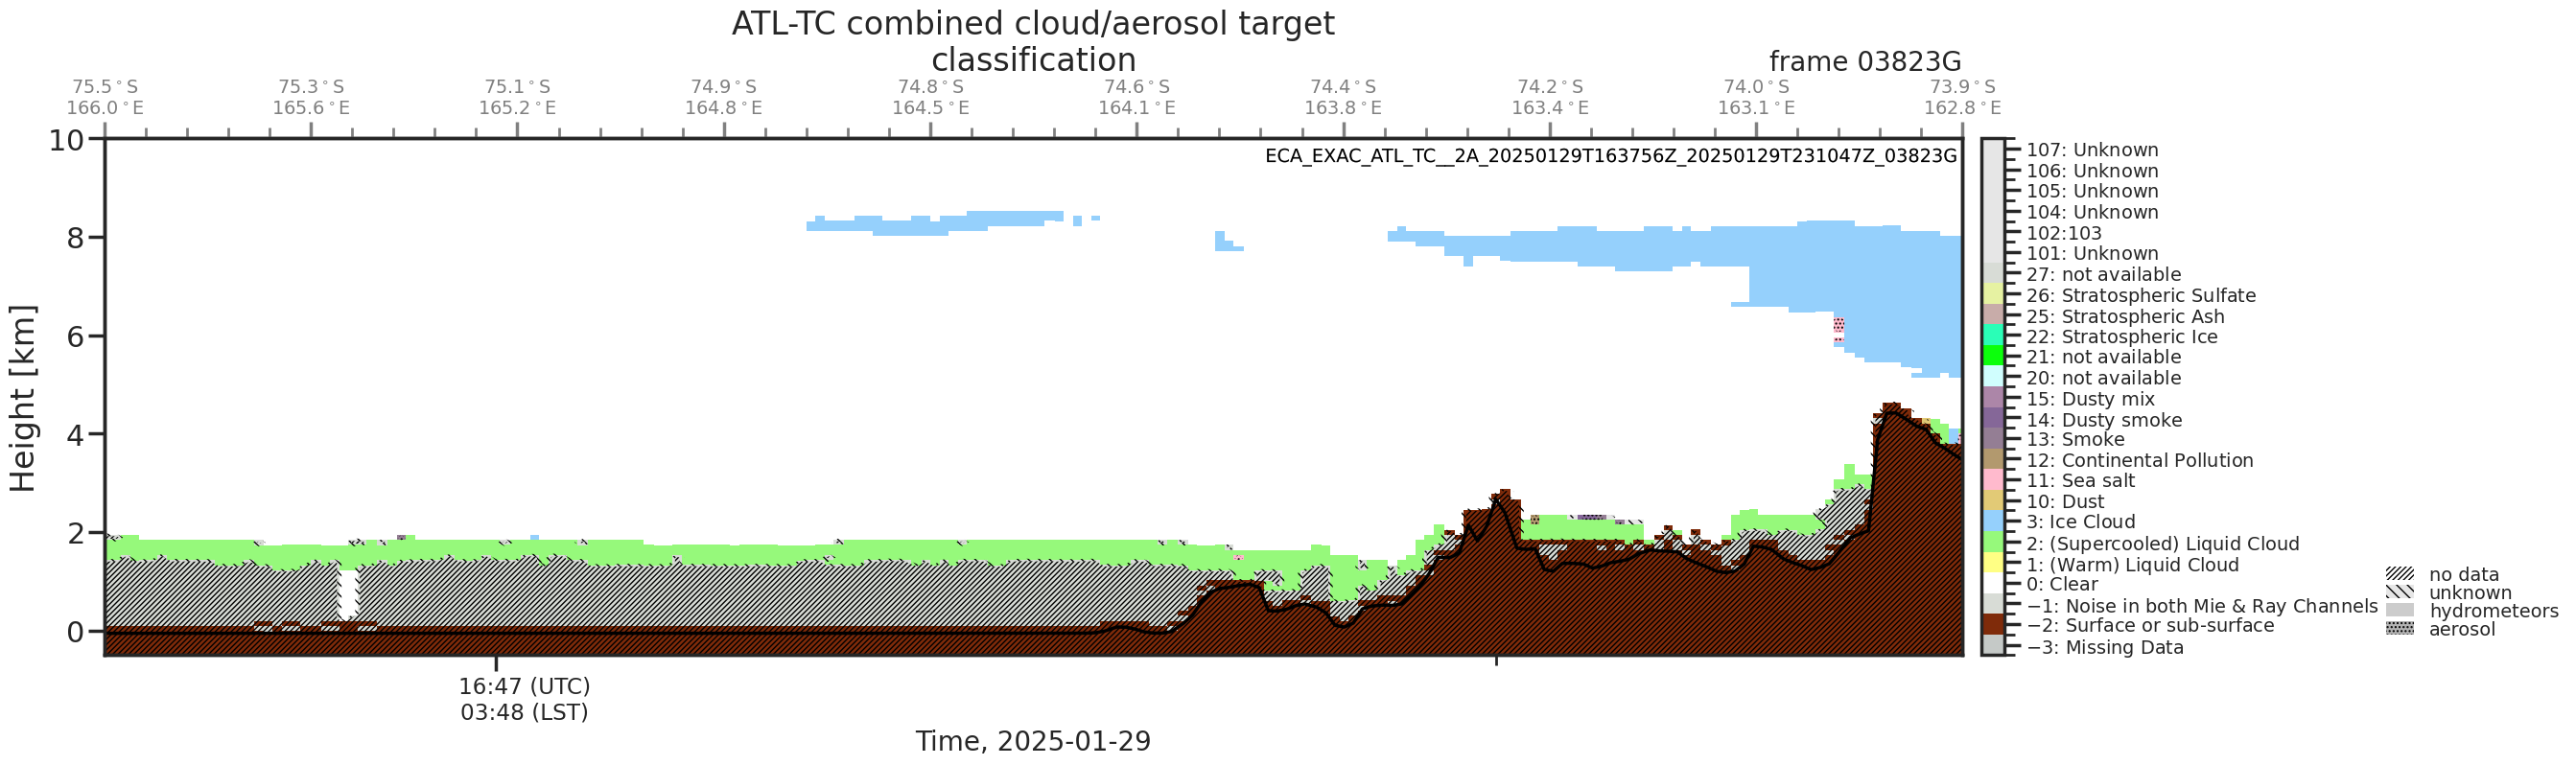

In [37]:
ecplt.quicklook_ATC(ATC_sel, dstdir=None, hmax=1e4)